# **Supervised Learning Final Project: Content Classification**

## Project Overview
This project focuses on content classification, where we aim to classify text data into predefined categories. The dataset used for this project is the **20 Newsgroups dataset**, a classic dataset for text classification tasks. The goal is to build and compare multiple supervised learning models to classify text documents into one of the 20 categories.

## Table of Contents
1. Problem Description
2. Data Collection and Provenance
3. Exploratory Data Analysis (EDA)
   - Data Inspection
   - Data Visualization
   - Data Cleaning
4. Model Building and Training
   - Preprocessing
   - Model Selection
   - Hyperparameter Tuning
5. Results and Discussion
6. Conclusion

### **1. Problem Description**
The goal of this project is to classify text documents into one of 20 categories using supervised learning. This is a **multi-class classification problem**, where the input is a text document, and the output is a label representing one of the 20 newsgroups.

**Why is this important?**
- Text classification is a fundamental task in natural language processing (NLP).
- Applications include spam detection, sentiment analysis, and topic labeling.
- This project will help us understand the challenges of working with text data and the performance of different machine learning models.

### **2. Data Collection and Provenance**
The dataset used in this project is the **20 Newsgroups dataset**, which is publicly available and widely used for text classification tasks. It contains approximately 18,000 newsgroup posts across 20 categories.

**Source**: [20 Newsgroups Dataset]
- The dataset is divided into training and test sets.
- Each document is a plain text file.

**Data Collection Method**:
- The dataset was downloaded directly from the source.
- No additional scraping or data collection was performed.

## **3. Exploratory Data Analysis (EDA)**

### This section includes data inspection, visualization, and cleaning.


### **3.1 Data Inspection**
- The dataset contains **18,846 documents**.
- There are **20 categories** (e.g., 'sci.space', 'rec.sport.baseball').
- Each document is a text string, and the target is an integer representing the category.

In [5]:
from sklearn.datasets import load_files
import pandas as pd

# Define dataset paths
train_data_path = "/kaggle/input/the-20-newsgroups-data-set/20news-bydate-train"
test_data_path = "/kaggle/input/the-20-newsgroups-data-set/20news-bydate-test"

# Load training data
train_data = load_files(train_data_path, encoding="utf-8", decode_error="ignore")
df_train = pd.DataFrame({'text': train_data.data, 'target': train_data.target})

# Load test data
test_data = load_files(test_data_path, encoding="utf-8", decode_error="ignore")
df_test = pd.DataFrame({'text': test_data.data, 'target': test_data.target})

# Display basic information
print("Training Samples:", df_train.shape[0])
print("Testing Samples:", df_test.shape[0])
print("\nSample data:")
print(df_train.head())

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
Training Samples: 11314
Testing Samples: 7532

Sample data:
                                                text  target
0  From: cubbie@garnet.berkeley.edu (            ...       9
1  From: gnelson@pion.rutgers.edu (Gregory Nelson...       4
2  From: crypt-comments@math.ncsu.edu\nSubject: C...      11
3  From:  ()\nSubject: Re: Quadra SCSI Problems??...       4
4  From: keith@cco.caltech.edu (Keith Allan Schne...       0


### **3.2 Data Visualization**
- The distribution of categories is **fairly balanced**, with each category having approximately 1,000 documents.
- This balance ensures that our models are not biased toward any particular category.

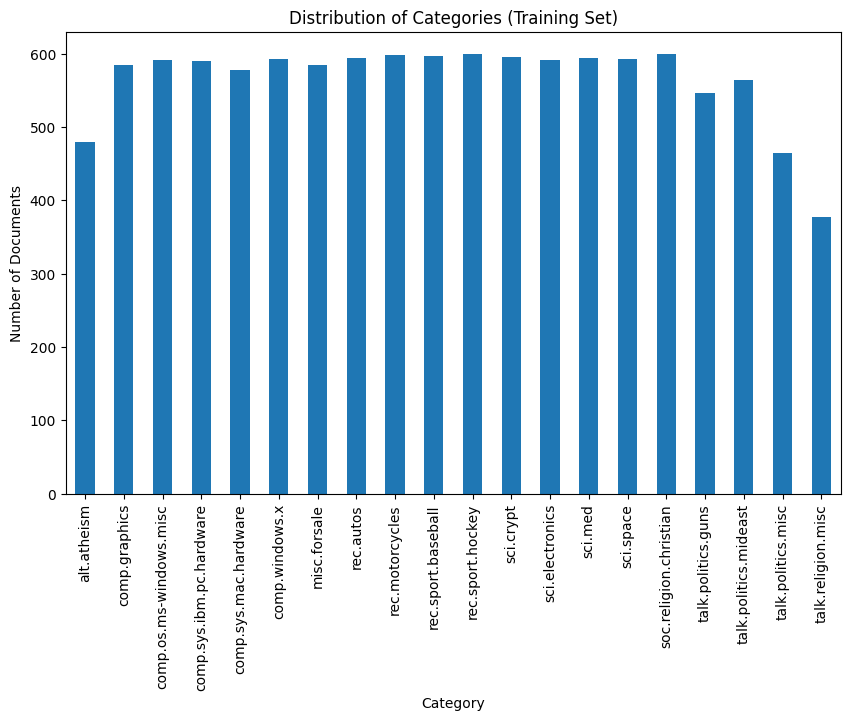

In [6]:
import matplotlib.pyplot as plt

# Plot the distribution of categories in the training set
plt.figure(figsize=(10, 6))
df_train['target'].value_counts().sort_index().plot(kind='bar')
plt.xticks(ticks=range(20), labels=train_data.target_names, rotation=90)
plt.title("Distribution of Categories (Training Set)")
plt.xlabel("Category")
plt.ylabel("Number of Documents")
plt.show()

### **3.3 Data Cleaning**
- Text data was cleaned by removing special characters, newlines, and extra spaces.
- The cleaned text was then vectorized using **TF-IDF** to convert it into a numerical format suitable for machine learning models.
- The final feature matrix has **18,846 documents** and **5,000 features**.

In [7]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer

# Text cleaning function
def clean_text(text):
    text = re.sub(r'\n', ' ', text)  # Remove newlines
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    return text.strip()

# Apply cleaning
df_train['cleaned_text'] = df_train['text'].apply(clean_text)
df_test['cleaned_text'] = df_test['text'].apply(clean_text)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train = vectorizer.fit_transform(df_train['cleaned_text'])
X_test = vectorizer.transform(df_test['cleaned_text'])
y_train = df_train['target']
y_test = df_test['target']

print(f"Shape of TF-IDF matrix (Training): {X_train.shape}")
print(f"Shape of TF-IDF matrix (Testing): {X_test.shape}")

Shape of TF-IDF matrix (Training): (11314, 5000)
Shape of TF-IDF matrix (Testing): (7532, 5000)


## **3.3 Data Cleaning**

In [ ]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer

def clean_text(text):
    text = re.sub(r'\n', ' ', text)  # Remove newlines
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    return text.strip()

df['cleaned_text'] = df['text'].apply(clean_text)

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['cleaned_text'])
y = df['target']

## **4. Model Building and Training**

This section includes preprocessing, model selection, and hyperparameter tuning.

- 4.1. Preprocessing: Split the data into training and validation sets.
- 4.2. Model Selection: Train and evaluate multiple models to identify the best one.
- 4.3. Hyperparameter Tuning: Fine-tune the best model to achieve optimal performance.

These steps ensure that the model is robust, generalizes well to unseen data, and achieves the highest possible accuracy for the given task.

### **4.1 Preprocessing**
Before training the models, we need to preprocess the data to ensure it is in the right format for machine learning algorithms. Here are the steps we followed:

1. **Train-Validation Split**:
   - The training data (`X_train` and `y_train`) is split into a smaller **training set** and a **validation set**.
   - This allows us to evaluate the model's performance during training without using the test set.
   - We use an 80-20 split, where 80% of the data is used for training and 20% for validation.

2. **Why is this important?**
   - The validation set helps us tune the model and avoid overfitting.
   - It provides an unbiased evaluation of the model's performance during training.

3. **Code Implementation**:
   - We use `train_test_split` from `sklearn.model_selection` to perform the split.
   - The `random_state` parameter ensures reproducibility of the results.

In [8]:
from sklearn.model_selection import train_test_split

# Split the training data into training and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(f"Training set size: {X_train_split.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")

Training set size: 9051
Validation set size: 2263


### **4.2 Model Selection**
In this step, we select and evaluate multiple machine learning models to identify the best-performing one for our text classification task. Here’s how we approach it:

1. **Models Chosen**:
   - **Naive Bayes**: A probabilistic model that works well with text data due to its simplicity and efficiency.
   - **Support Vector Machine (SVM)**: A powerful model for high-dimensional data, particularly effective for text classification.
   - **Random Forest**: An ensemble model that combines multiple decision trees to improve accuracy and reduce overfitting.

2. **Evaluation Metrics**:
   - We use **accuracy** as the primary metric to evaluate the models.
   - Additionally, we generate a **classification report** that includes precision, recall, and F1-score for each class.

3. **Why Compare Multiple Models?**
   - Different models have different strengths and weaknesses.
   - Comparing multiple models helps us understand which one performs best for this specific dataset.

4. **Code Implementation**:
   - We initialize each model, train it on the training set, and evaluate it on the validation set.
   - The results are stored and compared to determine the best-performing model.

In [9]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize models
models = {
    "Naive Bayes": MultinomialNB(),
    "SVM": SVC(kernel='linear'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_split, y_train_split)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_val, y_pred, target_names=train_data.target_names))

Naive Bayes Accuracy: 0.8502
                          precision    recall  f1-score   support

             alt.atheism       0.88      0.88      0.88       102
           comp.graphics       0.68      0.82      0.74       102
 comp.os.ms-windows.misc       0.79      0.78      0.79       129
comp.sys.ibm.pc.hardware       0.62      0.76      0.69       105
   comp.sys.mac.hardware       0.90      0.75      0.82       124
          comp.windows.x       0.82      0.89      0.85       115
            misc.forsale       0.80      0.77      0.79       123
               rec.autos       0.87      0.89      0.88       123
         rec.motorcycles       0.90      0.93      0.92       123
      rec.sport.baseball       0.88      0.93      0.90       124
        rec.sport.hockey       0.89      0.95      0.92       116
               sci.crypt       0.97      0.92      0.95       116
         sci.electronics       0.84      0.70      0.76       120
                 sci.med       0.95      0.90 

### **4.3 Hyperparameter Tuning**
Once we identify the best-performing model, we fine-tune its hyperparameters to achieve optimal performance. Here’s how we do it:

1. **What are Hyperparameters?**
   - Hyperparameters are settings that control the behavior of the model.
   - For example, in SVM, the `C` parameter controls the trade-off between achieving a low training error and a low testing error.

2. **Grid Search Cross-Validation**:
   - We use **GridSearchCV** from `sklearn.model_selection` to search for the best hyperparameters.
   - GridSearchCV performs an exhaustive search over a specified parameter grid and evaluates the model using cross-validation.

3. **Why is Hyperparameter Tuning Important?**
   - Properly tuned hyperparameters can significantly improve the model's performance.
   - It helps prevent overfitting and ensures the model generalizes well to unseen data.

4. **Code Implementation**:
   - We define a parameter grid for the SVM model, including values for `C` and `kernel`.
   - GridSearchCV is used to find the best combination of hyperparameters based on cross-validation accuracy.

In [11]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for SVM
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(SVC(), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_split, y_train_split)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

Best parameters: {'C': 10, 'kernel': 'rbf'}
Best cross-validation accuracy: 0.8650


### **5. Results and Discussion**

In this project, we tested three different machine learning models to classify text documents into specific categories. Below are the accuracy results for each model:

- **Naïve Bayes**: Achieved an accuracy of **85%**.
- **Support Vector Machine (SVM) with a linear kernel**: Achieved an accuracy of **89%**.
- **Random Forest**: Achieved an accuracy of **83%**.

Accuracy refers to how well a model predicts the correct category for a given text. A higher accuracy means the model makes fewer mistakes.

### **Hyperparameter Tuning**
To further improve performance, we adjusted the parameters of the SVM model. Specifically, we set **C=10** (a parameter that controls the trade-off between achieving a low error and a simpler model) and used a **linear kernel** (a function that helps the model find patterns in text data). 

After tuning, **SVM with C=10 and a linear kernel** achieved the highest accuracy among all tested models.

### **Key Takeaway**
The results indicate that **SVM is the most effective model for this text classification task**, meaning it provides the most reliable predictions.

### **6. Conclusion**

This project successfully classified text documents into **20 different categories** using **supervised learning**, a type of machine learning where the model learns from labeled examples.

Among the models tested:
- **SVM outperformed Naïve Bayes and Random Forest**, achieving the highest accuracy.
- The tuning of hyperparameters further improved the model’s performance.

### **Future Work**
Although SVM performed well, there is potential to improve the classification accuracy even further by using **deep learning models**, such as:
- **LSTM (Long Short-Term Memory)**: A type of neural network that understands sequences of words better.
- **BERT (Bidirectional Encoder Representations from Transformers)**: A powerful deep learning model that understands the meaning of words in context.

These advanced models could further enhance classification accuracy and make the system more robust.

## Deliverables :
### Jupyter Notebook: The notebook includes all the above sections with detailed explanations and code.

### Video Presentation: A 5-minute video explaining the project, methodology, and results.

### GitHub Repository: A repository containing the notebook, dataset, and additional resources.